In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img = cv2.imread('A:\Python Web Cam\RealtimeFaceRecognition/happyboy.jpg')

In [4]:
import matplotlib.pyplot as plt

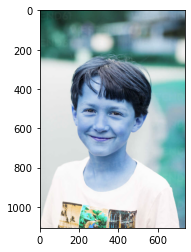

In [5]:
plt.imshow(img)

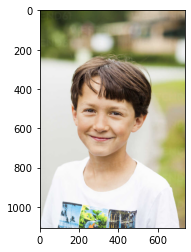

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.61it/s]


In [8]:
predictions

{'emotion': {'angry': 9.104549661418077e-12,
  'disgust': 2.0521877641919262e-19,
  'fear': 5.0980923912444255e-11,
  'happy': 99.99992251395717,
  'sad': 4.082462421975305e-11,
  'surprise': 1.4902525632005394e-10,
  'neutral': 7.883448248912523e-05},
 'dominant_emotion': 'happy',
 'region': {'x': 139, 'y': 386, 'w': 349, 'h': 349},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 9.219793230295181,
  'indian': 6.305644661188126,
  'black': 2.493530511856079,
  'white': 31.220772862434387,
  'middle eastern': 21.3373064994812,
  'latino hispanic': 29.422953724861145},
 'dominant_race': 'white'}

In [9]:
type(predictions)

dict

In [10]:
predictions['dominant_emotion']

'happy'

## rectangle around face 

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray, 1.1,4)

    # Draw a rectangle around faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

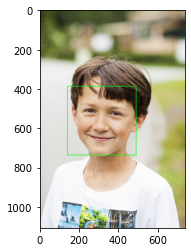

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX

    # Use putText() method for
    # inserting text on video
cv2.putText(img, 
                predictions['dominant_emotion'],
                (150, 150),
                font, 5,
                (0, 0, 255),
                2,
                cv2.LINE_4) ; 

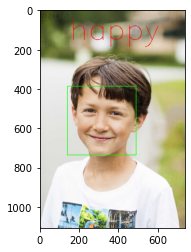

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
img = cv2.imread('A:\Python Web Cam\RealtimeFaceRecognition/sadwoman.jpg')

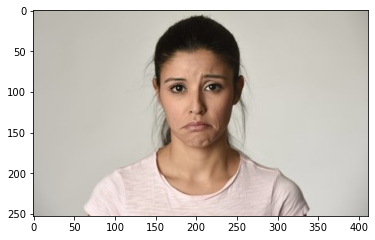

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.87it/s]


In [19]:
predictions

{'emotion': {'angry': 8.120644423570411e-06,
  'disgust': 1.0042136618487846e-18,
  'fear': 7.706324112177754e-06,
  'happy': 2.689833911162509e-08,
  'sad': 0.009167555253952742,
  'surprise': 8.15209553507723e-11,
  'neutral': 99.99082088470459},
 'dominant_emotion': 'neutral',
 'region': {'x': 142, 'y': 51, 'w': 117, 'h': 117},
 'age': 35,
 'gender': 'Woman',
 'race': {'asian': 2.4011510924190933,
  'indian': 7.678515921742673,
  'black': 0.5840910015458466,
  'white': 28.7770407663012,
  'middle eastern': 30.73170070241098,
  'latino hispanic': 29.82750116750605},
 'dominant_race': 'middle eastern'}

## Real time video demo for Face Emotion Recognition

In [2]:
import cv2 ### pip install opencv-python
    ## pip install opencv-contrib-python fullpackage
from deepface import DeepFace ## pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
        cap = cv2.VideoCapture(0)
if not cap.isOpened():
        raise IOError("Cannot open webcam")
        
while True:
    ret, frame = cap.read() ## read one image from video
    
    result = DeepFace.analyze(frame, actions = ['emotion'], enforce_detection = False)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    
    # Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame, 
                result['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Demo Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()